In [39]:
#import all the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [40]:
#define the file path and read the csv file
file_path = "../Resources/AIHW-2021-Cancer-incidence-by-age-10-year-age-groups.csv"
cancers_df = pd.read_csv(file_path, encoding='cp1252')

cancers_df.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)",ICD10 codes
0,Actual,Acute lymphoblastic leukaemia,1982,Males,00–09,67,5.5,C91.0
1,Actual,Acute lymphoblastic leukaemia,1982,Males,10–19,28,2.1,C91.0
2,Actual,Acute lymphoblastic leukaemia,1982,Males,20–29,7,0.5,C91.0
3,Actual,Acute lymphoblastic leukaemia,1982,Males,30–39,8,0.7,C91.0
4,Actual,Acute lymphoblastic leukaemia,1982,Males,40–49,1,0.1,C91.0


In [41]:
#only keep the relevant columns. Since we not gonna use the ICD10 column, we can drop it since this not only make the data look cleaner but also help the compile the code faster
#cancers_df.drop('ICD10 codes', axis=1, inplace=True)
cancers_df = cancers_df[['Data type', 'Cancer group/site', 'Year', 'Sex',
                         'Age group (years)', 'Count', 'Age-specific rate\n(per 100,000)']]
cancers_df.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
0,Actual,Acute lymphoblastic leukaemia,1982,Males,00–09,67,5.5
1,Actual,Acute lymphoblastic leukaemia,1982,Males,10–19,28,2.1
2,Actual,Acute lymphoblastic leukaemia,1982,Males,20–29,7,0.5
3,Actual,Acute lymphoblastic leukaemia,1982,Males,30–39,8,0.7
4,Actual,Acute lymphoblastic leukaemia,1982,Males,40–49,1,0.1


In [42]:
# convert the "count" and "asr" column to numerical values
cancers_df = cancers_df.astype({'Count' : 'float', 
                                'Age-specific rate\n(per 100,000)': 'float'})
cancers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92466 entries, 0 to 92465
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data type                        92466 non-null  object 
 1   Cancer group/site                92466 non-null  object 
 2   Year                             92466 non-null  int64  
 3   Sex                              92466 non-null  object 
 4   Age group (years)                92466 non-null  object 
 5   Count                            92466 non-null  float64
 6   Age-specific rate
(per 100,000)  92466 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.9+ MB


Now we can look at different type of cancers and their number of incidences in 2021 and visualise them on a bar plot.

In [43]:
#extract only the data in 2021
cancer_2021 = cancers_df[(cancers_df['Year'] == 2021) & (cancers_df['Age group (years)'] == 'All ages combined') & (cancers_df['Sex'] == 'Persons')]
cancer_2021.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
1319,Projections,Acute lymphoblastic leukaemia,2021,Persons,All ages combined,446.0,1.7
2639,Projections,Acute myeloid leukaemia,2021,Persons,All ages combined,1089.0,4.1
3266,Projections,All blood cancers combined,2021,Persons,All ages combined,18485.0,70.3
4586,Projections,All cancers combined,2021,Persons,All ages combined,150782.0,573.3
5906,Projections,All sarcomas combined,2021,Persons,All ages combined,2345.0,8.9


In [44]:
total_count_2021 =  cancer_2021.groupby('Cancer group/site')['Count'].sum()
total_incident_2021 = pd.DataFrame(total_count_2021).reset_index()
total_incident_2021.drop(3, inplace=True)
total_incident_2021.head()

,Cancer group/site,Count
0,Acute lymphoblastic leukaemia,446.0
1,Acute myeloid leukaemia,1089.0
2,All blood cancers combined,18485.0
4,All sarcomas combined,2345.0
5,Anal cancer,591.0


In [45]:
total_incident_2021[total_incident_2021['Cancer group/site'] == 'Melanoma of the skin']

,Cancer group/site,Count
33,Melanoma of the skin,16878.0


In [46]:
total_incident_2021[total_incident_2021['Cancer group/site'] == 'Non-melanoma skin cancer (rare types)']

,Cancer group/site,Count
42,Non-melanoma skin cancer (rare types),1368.0


The data consist of melanoma of skin and non-melanoma of skin cancers. For the purpuse of this part of the project is to compare different types of cancers but not spcific in any type. We can combine them into just "skin cancer".

In [47]:
# add a new row that call "skin cancer" that equal combination incidence of both melonoma and non-melenoma of skin cancers. 
# Drop the melonoma and non-melenoma rows
total_incident_2021 = total_incident_2021.append({'Cancer group/site': 'Skin cancer', 'Count': 16878+1368}, ignore_index=True)
total_incident_2021.head()

,Cancer group/site,Count
0,Acute lymphoblastic leukaemia,446.0
1,Acute myeloid leukaemia,1089.0
2,All blood cancers combined,18485.0
3,All sarcomas combined,2345.0
4,Anal cancer,591.0


In [48]:
total_incident_2021[total_incident_2021['Cancer group/site'] == 'Skin cancer']
#total_incident_2021.drop(77, inplace=True)

,Cancer group/site,Count
76,Skin cancer,18246.0


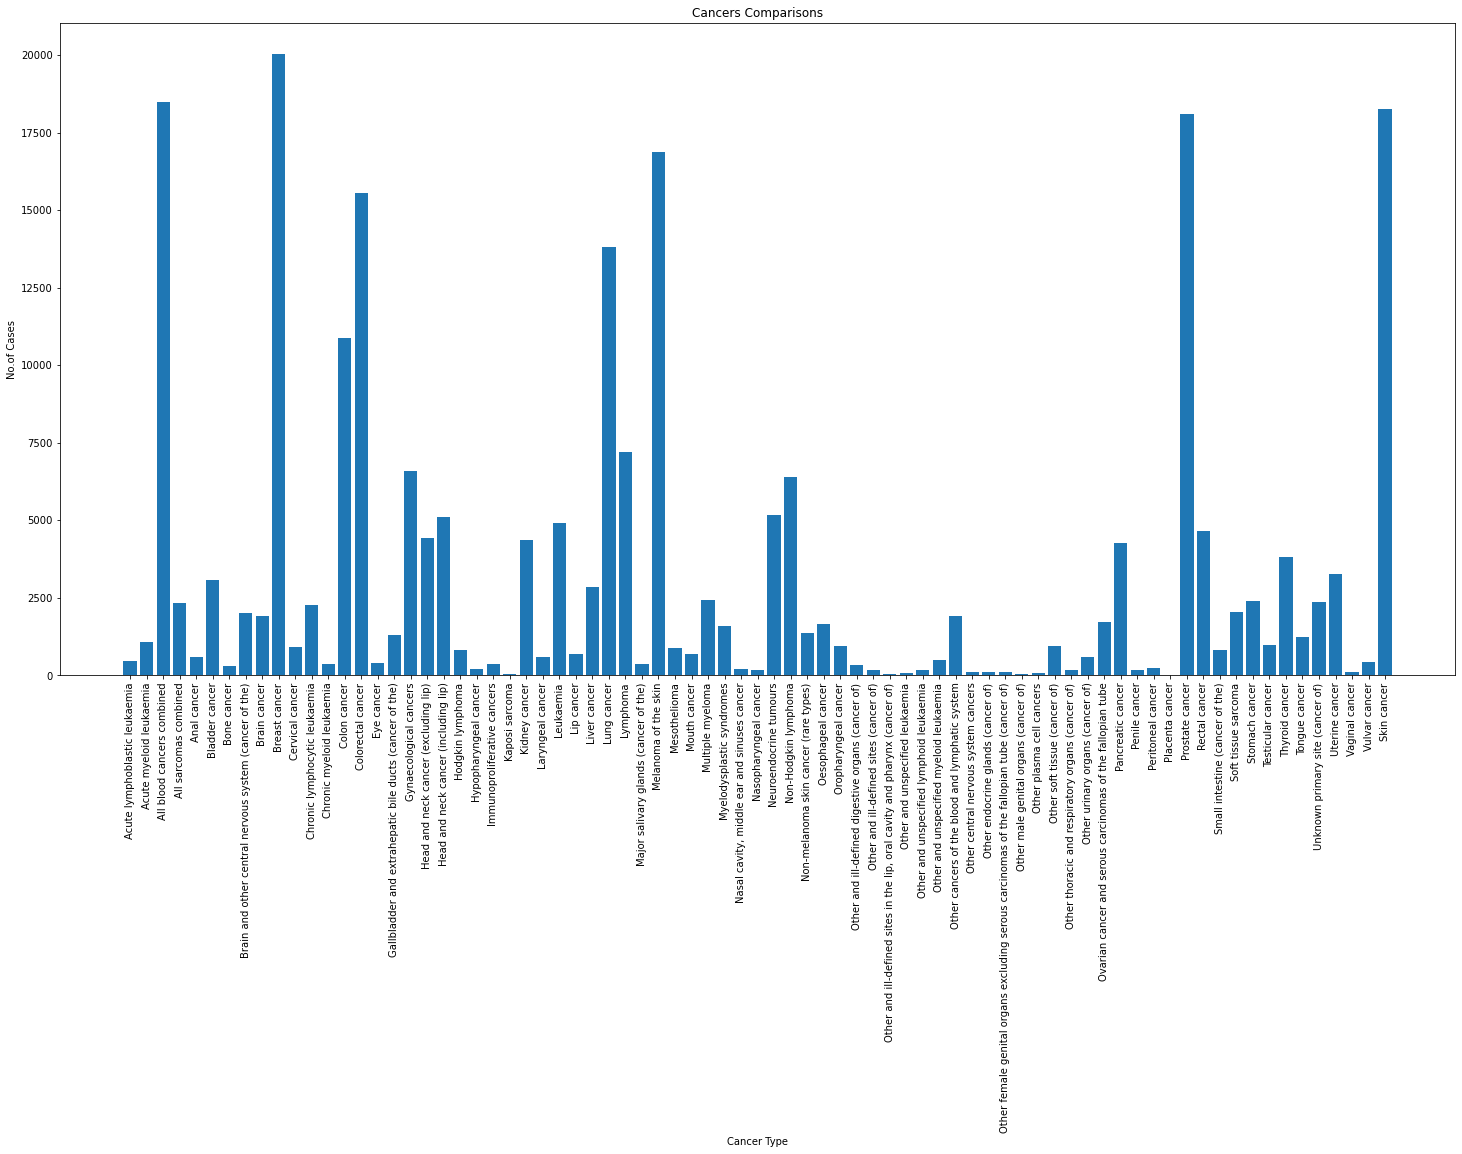

In [49]:
# plot the bar chart that shows all in incidence count for different types of cancer in 2021
plt.figure(figsize=(25, 12))
plt.bar(total_incident_2021['Cancer group/site'], total_incident_2021['Count'])
plt.xticks(total_incident_2021['Cancer group/site'], rotation='vertical')
plt.title('Cancers Comparisons')
plt.xlabel('Cancer Type')
plt.ylabel('No.of Cases')
plt.savefig("../Images/cancers comparison.png")


The top 5 cancer types in Australia are Breast cancer, Blood cancers, Skin cancers and Prostate cancer

This part of the project will extract data and plot the cancer incidence overtime since 1982 to 2021 and observe the trend.

In [50]:
cancers_df.head()
cancers_trend = cancers_df[(cancers_df['Sex'] == 'Persons') & (cancers_df['Age group (years)'] == "All ages combined")]
cancers_male = cancers_df[(cancers_df['Sex'] == 'Males') & (cancers_df['Age group (years)'] == "All ages combined")]
cancers_female = cancers_df[(cancers_df['Sex'] == 'Females') & (cancers_df['Age group (years)'] == "All ages combined")]

cancers_sex = cancers_df[(cancers_df['Age group (years)'] == "All ages combined")]
cancers_trend.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
32,Actual,Acute lymphoblastic leukaemia,1982,Persons,All ages combined,224.0,1.5
65,Actual,Acute lymphoblastic leukaemia,1983,Persons,All ages combined,188.0,1.2
98,Actual,Acute lymphoblastic leukaemia,1984,Persons,All ages combined,218.0,1.4
131,Actual,Acute lymphoblastic leukaemia,1985,Persons,All ages combined,249.0,1.6
164,Actual,Acute lymphoblastic leukaemia,1986,Persons,All ages combined,224.0,1.4


In [51]:
cancers_groupbu_sex = cancers_sex.groupby(['Year', 'Sex'])
total_incident_sex = cancers_groupbu_sex['Count'].sum()

In [52]:
total_incident_sex.reset_index()

,Year,Sex,Count
0,1982,Females,55011.0
1,1982,Males,61272.0
2,1982,Persons,116283.0
3,1983,Females,56459.0
4,1983,Males,62855.0
...,...,...,...
115,2020,Males,197783.0
116,2020,Persons,369422.0
117,2021,Females,174996.0
118,2021,Males,200354.0


In [53]:
year = np.arange(1982, 2022)
year

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [54]:
total_incident_sex_df = pd.DataFrame(total_incident_sex).reset_index()
total_incident_sex_df.head()

,Year,Sex,Count
0,1982,Females,55011.0
1,1982,Males,61272.0
2,1982,Persons,116283.0
3,1983,Females,56459.0
4,1983,Males,62855.0


1.0
In 10 years (2032), the number of cancer case in australia would be 446147


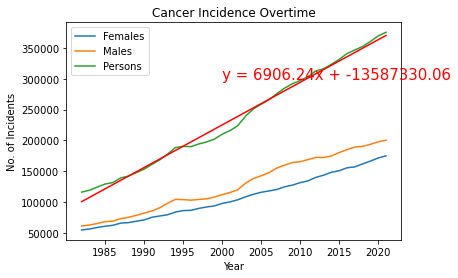

In [55]:
plt.plot(year, total_incident_sex_df[total_incident_sex_df['Sex'] == 'Females']['Count'], label='Females')
plt.plot(year, total_incident_sex_df[total_incident_sex_df['Sex'] == 'Males']['Count'], label='Males')
plt.plot(year, total_incident_sex_df[total_incident_sex_df['Sex'] == 'Persons']['Count'], label='Persons')

#calculate the correlation
x = year
y = total_incident_sex_df[total_incident_sex_df['Sex'] == 'Persons']['Count']
correlation = st.pearsonr(x,y)
print(f"{round(correlation[0], 2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, 'r-')
print(f"In 10 years (2032), the number of cancer case in australia would be {round(2032 * slope + intercept)}")
plt.legend()
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Cancer Incidence Overtime')
plt.annotate(line_eq,(2000,300000),fontsize=15,color="red")
plt.savefig("../Images/Cancer Incidence overtime.png")

The number of cancer incidence increase in linear behaviour over time. Males are dominant females for number of incidence overtime

Let investigate at what age groups are more likely to have cancer

In [56]:
cancers_df.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
0,Actual,Acute lymphoblastic leukaemia,1982,Males,00–09,67.0,5.5
1,Actual,Acute lymphoblastic leukaemia,1982,Males,10–19,28.0,2.1
2,Actual,Acute lymphoblastic leukaemia,1982,Males,20–29,7.0,0.5
3,Actual,Acute lymphoblastic leukaemia,1982,Males,30–39,8.0,0.7
4,Actual,Acute lymphoblastic leukaemia,1982,Males,40–49,1.0,0.1


In [57]:
cancers_age = cancers_df[(cancers_df['Age group (years)'] != "All ages combined") & (cancers_df['Year']==2021)]
cancers_age

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
1287,Projections,Acute lymphoblastic leukaemia,2021,Males,00–09,91.0,5.3
1288,Projections,Acute lymphoblastic leukaemia,2021,Males,10–19,39.0,2.4
1289,Projections,Acute lymphoblastic leukaemia,2021,Males,20–29,21.0,1.1
1290,Projections,Acute lymphoblastic leukaemia,2021,Males,30–39,13.0,0.7
1291,Projections,Acute lymphoblastic leukaemia,2021,Males,40–49,15.0,0.9
...,...,...,...,...,...,...,...
92460,Projections,Vulvar cancer,2021,Persons,50–59,66.0,2.1
92461,Projections,Vulvar cancer,2021,Persons,60–69,105.0,3.9
92462,Projections,Vulvar cancer,2021,Persons,70–79,103.0,5.3
92463,Projections,Vulvar cancer,2021,Persons,80–89,99.0,11.5


In [58]:
cancers_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1287 to 92464
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data type                        2190 non-null   object 
 1   Cancer group/site                2190 non-null   object 
 2   Year                             2190 non-null   int64  
 3   Sex                              2190 non-null   object 
 4   Age group (years)                2190 non-null   object 
 5   Count                            2190 non-null   float64
 6   Age-specific rate
(per 100,000)  2190 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 136.9+ KB


In [59]:
cancers_age['Age-specific rate\n(per 100,000)']

1287      5.3
1288      2.4
1289      1.1
1290      0.7
1291      0.9
         ... 
92460     2.1
92461     3.9
92462     5.3
92463    11.5
92464    10.5
Name: Age-specific rate\n(per 100,000), Length: 2190, dtype: float64

In [60]:
cancer_groupby_age = cancers_age.groupby(['Age group (years)', 'Sex'])['Age-specific rate\n(per 100,000)'].sum()
cancers_age_data = pd.DataFrame(cancer_groupby_age).reset_index()
cancers_age_data

,Age group (years),Sex,"Age-specific rate\n(per 100,000)"
0,00–09,Females,56.5
1,00–09,Males,61.9
2,00–09,Persons,59.1
3,10–19,Females,72.6
4,10–19,Males,72.8
5,10–19,Persons,72.2
6,20–29,Females,158.1
7,20–29,Males,132.5
8,20–29,Persons,144.2
9,30–39,Females,421.7


In [61]:
# create a separate data frame to plot the data 
plotdata = pd.DataFrame({'Females': list(cancers_age_data[cancers_age_data['Sex'] == 'Females']['Age-specific rate\n(per 100,000)']),
                         'Males':  list(cancers_age_data[cancers_age_data['Sex'] == 'Males']['Age-specific rate\n(per 100,000)']),
                         'Persons': list(cancers_age_data[cancers_age_data['Sex'] == 'Persons']['Age-specific rate\n(per 100,000)'])}, 
                         index=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])

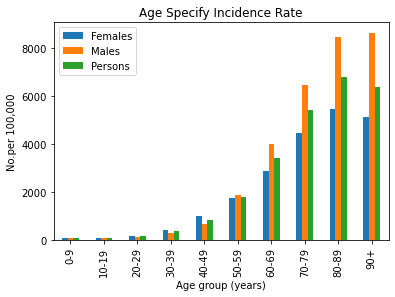

In [62]:
plotdata.plot(kind='bar')
plt.title('Age Specify Incidence Rate')
plt.xlabel('Age group (years)')
plt.ylabel('No.per 100,000')
plt.savefig("../Images/Age specify incidence rate.png")


As we're likely top have cancer as wer grow
Females tends to have cancer at younger age compare to males, but vice versa as we grow

Let repeat the analysis specifucly in skin cancers

In [63]:
skin_cancers = cancers_df[(cancers_df['Cancer group/site'] == 'Melanoma of the skin') | (cancers_df['Cancer group/site'] == 'Non-melanoma skin cancer (rare types)')]
skin_cancers.head()

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
41987,Actual,Melanoma of the skin,1982,Males,00–09,0.0,0.0
41988,Actual,Melanoma of the skin,1982,Males,10–19,36.0,2.7
41989,Actual,Melanoma of the skin,1982,Males,20–29,135.0,10.3
41990,Actual,Melanoma of the skin,1982,Males,30–39,242.0,20.7
41991,Actual,Melanoma of the skin,1982,Males,40–49,264.0,31.9


In [64]:
skin_cancers_trend = skin_cancers[(skin_cancers['Sex'] == 'Persons') & (skin_cancers['Age group (years)'] == "All ages combined")]
skin_cancers_male = skin_cancers[(skin_cancers['Sex'] == 'Males') & (skin_cancers['Age group (years)'] == "All ages combined")]
skin_cancers_female = skin_cancers[(cancers_df['Sex'] == 'Females') & (skin_cancers['Age group (years)'] == "All ages combined")]

skin_cancers_trend.head()

C:\Users\Huy Dinh\AppData\Local\Temp\ipykernel_9940\565333286.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  skin_cancers_female = skin_cancers[(cancers_df['Sex'] == 'Females') & (skin_cancers['Age group (years)'] == "All ages combined")]


,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
42019,Actual,Melanoma of the skin,1982,Persons,All ages combined,3543.0,23.3
42052,Actual,Melanoma of the skin,1983,Persons,All ages combined,3796.0,24.7
42085,Actual,Melanoma of the skin,1984,Persons,All ages combined,4045.0,26.0
42118,Actual,Melanoma of the skin,1985,Persons,All ages combined,4510.0,28.6
42151,Actual,Melanoma of the skin,1986,Persons,All ages combined,4711.0,29.4


In [65]:
skin_cancers_sex = skin_cancers[(skin_cancers['Age group (years)'] == "All ages combined")]

In [66]:
skin_cancers_sex

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)"
41997,Actual,Melanoma of the skin,1982,Males,All ages combined,1740.0,23.0
42008,Actual,Melanoma of the skin,1982,Females,All ages combined,1803.0,23.7
42019,Actual,Melanoma of the skin,1982,Persons,All ages combined,3543.0,23.3
42030,Actual,Melanoma of the skin,1983,Males,All ages combined,1819.0,23.7
42041,Actual,Melanoma of the skin,1983,Females,All ages combined,1977.0,25.7
...,...,...,...,...,...,...,...
53822,Projections,Non-melanoma skin cancer (rare types),2020,Females,All ages combined,451.0,3.5
53833,Projections,Non-melanoma skin cancer (rare types),2020,Persons,All ages combined,1314.0,5.1
53844,Projections,Non-melanoma skin cancer (rare types),2021,Males,All ages combined,902.0,6.9
53855,Projections,Non-melanoma skin cancer (rare types),2021,Females,All ages combined,466.0,3.5


In [67]:
skin_cancers_sex_df = pd.DataFrame(skin_cancers_sex.groupby(['Year', 'Sex'])['Count'].sum()).reset_index()

In [68]:
skin_cancers_sex_df

,Year,Sex,Count
0,1982,Females,1803.0
1,1982,Males,1740.0
2,1982,Persons,3543.0
3,1983,Females,1977.0
4,1983,Males,1819.0
...,...,...,...
115,2020,Males,10480.0
116,2020,Persons,17746.0
117,2021,Females,7475.0
118,2021,Males,10771.0


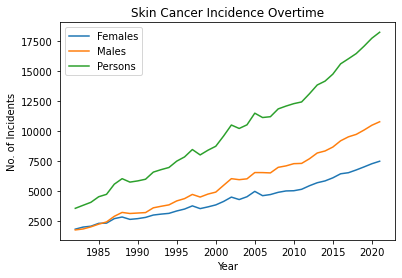

In [69]:
plt.plot(year, skin_cancers_sex_df[skin_cancers_sex_df['Sex'] == 'Females']['Count'], label='Females')
plt.plot(year, skin_cancers_sex_df[skin_cancers_sex_df['Sex'] == 'Males']['Count'], label='Males')
plt.plot(year, skin_cancers_sex_df[skin_cancers_sex_df['Sex'] == 'Persons']['Count'], label='Persons')

x = year
y = skin_cancers_sex_df[skin_cancers_sex_df['Sex'] == 'Persons']['Count']

#calculate the correlation
#correlation = st.pearsonr(x,y)
#print(f"{round(correlation[0], 2)}")
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x, regress_values, 'r-')
plt.legend()
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Skin Cancer Incidence Overtime')
plt.savefig("../Images/Skin cancers comparison.png")


Again, males tend to have more cancer  then female

In [70]:
#print(2032* slope + intercept)

In [71]:
skin_cancers_age = skin_cancers[(skin_cancers['Age group (years)'] != "All ages combined") & (skin_cancers['Year'] == 2021)]
skin_cancer_groupby_age = pd.DataFrame(skin_cancers_age.groupby(['Age group (years)', 'Sex'])['Age-specific rate\n(per 100,000)'].sum()).reset_index()
skin_cancer_groupby_age

,Age group (years),Sex,"Age-specific rate\n(per 100,000)"
0,00–09,Females,0.2
1,00–09,Males,0.2
2,00–09,Persons,0.2
3,10–19,Females,1.3
4,10–19,Males,0.4
5,10–19,Persons,0.9
6,20–29,Females,9.3
7,20–29,Males,6.4
8,20–29,Persons,7.9
9,30–39,Females,26.5


In [72]:
females = list(skin_cancer_groupby_age[skin_cancer_groupby_age['Sex'] == 'Females']['Age-specific rate\n(per 100,000)'])
males = list(skin_cancer_groupby_age[skin_cancer_groupby_age['Sex'] == 'Males']['Age-specific rate\n(per 100,000)'])
persons = list(skin_cancer_groupby_age[skin_cancer_groupby_age['Sex'] == 'Persons']['Age-specific rate\n(per 100,000)'])

In [73]:
plotdata = pd.DataFrame({'Females': females,
                         'Males':  males,
                         'Persons': persons}, 
                         index=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])

In [74]:
plotdata

,Females,Males,Persons
0-9,0.2,0.2,0.2
10-19,1.3,0.4,0.9
20-29,9.3,6.4,7.9
30-39,26.5,18.8,22.7
40-49,52.1,52.6,52.4
50-59,73.1,102.8,87.6
60-69,120.1,200.0,158.8
70-79,172.5,334.5,250.9
80-89,207.9,444.9,312.4
90+,229.9,526.7,333.4


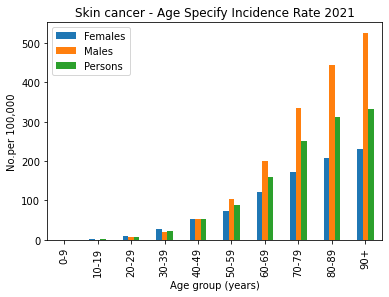

In [75]:
plotdata.plot(kind='bar')
plt.title('Skin cancer - Age Specify Incidence Rate 2021')
plt.xlabel('Age group (years)')
plt.ylabel('No.per 100,000')
plt.savefig("../Images/Skin cancer - Age Specify Incidence Rate.png")


Again, as we grow, male tend to have cancer then female